#### Introduction to computer vision, context mainly adopted from 'introduction to computer vision' course on Udacity. Python & Opencv is used in this series of tutorials. 
[source code on GitHub](https://github.com/Max1993Liu/Computer_Vision)

## Hough Transform

#### Voting
Voting is a general technique where we let the features vote for all models that are compatible with it.
1. cycle through features, each casting votes for model parameters.
2. Look for model parameters that receive a lot of votes.

#### Voting example: Fitting lines
1. Each edge point votes for compatible lines
2. Look for lines that get many votes

#### Hough space
[Hough space](https://en.wikipedia.org/wiki/Hough_transform)

#### Polar representation of lines
A line is represented by d:perpendicular distance from line to origin and Theta: angle the perpendicular makes with the x-axis

#### Extensions
1. Use the gradient
2. Give more votes for stronger edges
3. Change the bin size to give more/less resolution

#### Cons
1. Complexity of search time exponentially with the number of model parameters
2. Non-target shapes can produce spurious peaks in parameter space
3. Need to tune bin size

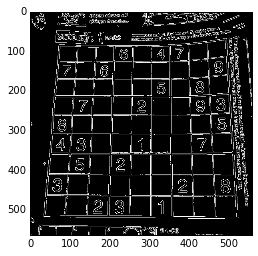

In [17]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
from scipy import misc

img = cv2.imread('./Dave.jpg',0)
edges = cv2.Canny(img, 50, 150)
plt.imshow(edges, cmap = 'gray')

The return of calling Houghline is <type 'numpy.ndarray'>.


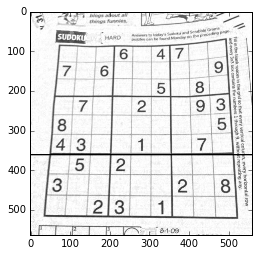

In [38]:
lines = cv2.HoughLines(edges, 1, np.pi/180, 200)
#lines is simply rho and theta
print "The return of calling Houghline is {}.".format(type(lines))
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

plt.imshow(img, cmap = 'gray')